In [1]:
import streamlit as st
import datetime
from glob import glob
from PIL import Image
import numpy as np
import base64
import io
import sys
import matplotlib.pyplot as plt

if '../app' not in sys.path:
    sys.path.append('../app/')

from utils.locate_timings import bin_confusion, confusion2transcript
from utils.identify_theme import send2chatgpt, split_confused_transcripts_by_line

In [2]:
d = input('Select a session date:')
d = datetime.datetime.strptime(str(d).replace('-', ''), "%Y%m%d")


In [3]:
d

datetime.datetime(2019, 3, 26, 0, 0)

In [4]:
select_confused_csv = '../confusion_processed/'+str(d.year)+str(d.month).zfill(2)+str(d.day).zfill(2)+'_confusion.csv'
avg_1min = bin_confusion(select_confused_csv)

In [5]:
avg_1min

[6.333333333333333,
 7.6,
 7.633333333333334,
 6.933333333333334,
 5.7,
 6.4,
 6.533333333333333,
 6.8,
 7.5,
 7.3,
 6.333333333333333,
 7.833333333333333,
 7.833333333333333,
 6.6,
 5.966666666666667,
 6.566666666666666,
 7.7,
 6.266666666666667,
 7.4,
 9.066666666666666,
 8.866666666666667,
 8.733333333333333,
 8.266666666666667,
 5.533333333333333,
 5.633333333333334,
 4.833333333333333,
 4.433333333333334,
 5.5,
 7.266666666666667,
 8.166666666666666,
 7.9,
 7.333333333333333,
 8.566666666666666,
 8.966666666666667,
 8.7,
 7.766666666666667,
 7.366666666666666,
 5.1,
 5.7,
 4.766666666666667,
 5.5,
 4.733333333333333,
 5.9,
 4.533333333333333,
 5.866666666666666,
 5.7,
 5.166666666666667,
 6.166666666666667,
 7.0,
 6.566666666666666,
 7.2,
 7.466666666666667,
 8.233333333333333,
 9.866666666666667,
 10.0,
 7.733333333333333,
 8.4,
 8.666666666666666,
 7.166666666666667,
 8.433333333333334,
 6.433333333333334,
 5.533333333333333,
 5.133333333333334,
 7.033333333333333,
 5.9666666666

In [6]:
a= np.mean(avg_1min)
b = np.std(avg_1min)
c = a+b
top_confused_min = np.array(np.where(avg_1min > c)[0])

In [7]:
a, b, c, top_confused_min

(7.203333333333333,
 1.402751264875962,
 8.606084598209295,
 array([19, 20, 21, 33, 34, 53, 54, 57, 67, 68, 69, 78]))

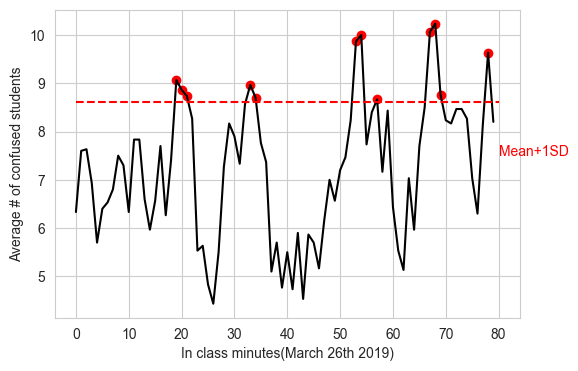

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(avg_1min, color = 'k')
ax.hlines(c, 0, 80, linestyle='dashed', label='Mean+1SD', color='red')
ax.text(80, 7.5, 'Mean+1SD', color='red')
ax.scatter(top_confused_min, np.array(avg_1min)[top_confused_min], color='red', marker='o')
ax.set_xlabel('In class minutes(March 26th 2019)')
ax.set_ylabel('Average # of confused students')
fig.savefig('../figure_panels/fig4a.svg', bbox_inches='tight', dpi=300)

In [18]:
avg_1min[np.array(top_confused_min)]

TypeError: only integer scalar arrays can be converted to a scalar index